In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2024-01-01'

stock  = 'GOOG'

df = yf.download(stock, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2023-12-22,142.047195,142.574696,141.385322,141.459980,18494700
2023-12-26,142.146729,143.266425,141.828230,142.305963,11170100


In [6]:
df.info
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,3018.000000,3018.000000,3018.000000,3018.000000,3.018000e+03
mean,60.436874,61.038858,59.807614,60.403396,4.382441e+07
std,38.660748,39.100783,38.218163,38.633782,3.507541e+07
min,13.858419,13.994016,13.795702,13.890397,1.584340e+05
25%,28.018579,28.314905,27.791950,28.056591,2.420150e+07
50%,51.177101,51.823045,50.604064,51.139280,3.168635e+07
75%,87.828012,88.791317,86.888705,87.834600,5.091553e+07
max,149.998535,151.382974,149.180909,151.147578,4.995615e+08


In [7]:
ma_100_days = df.Close.rolling(100).mean()

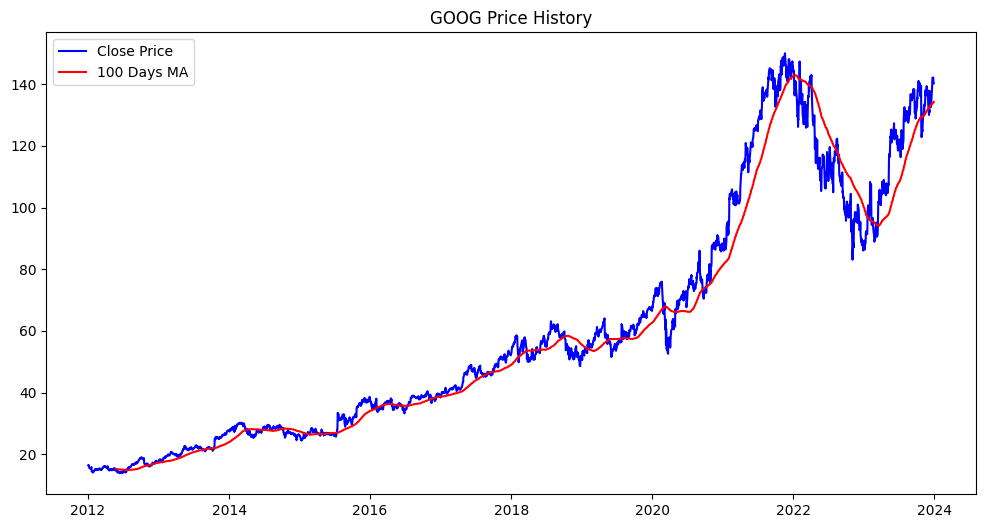

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(ma_100_days, label='100 Days MA', color='red')
plt.title(f'{stock} Price History') 
plt.legend()
plt.show()

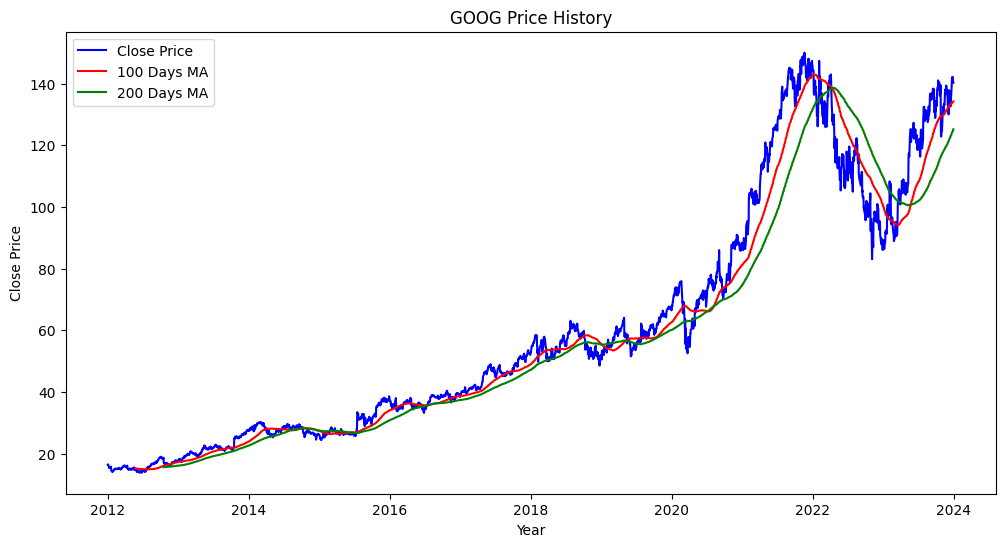

In [9]:
ma_200_days = df.Close.rolling(200).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(ma_100_days, label='100 Days MA', color='red')
plt.plot(ma_200_days, label='200 Days MA', color='green')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title(f'{stock} Price History')
plt.legend()
plt.show()

In [10]:
df.isnull().sum()


Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [11]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.8)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.80):len(df)])

In [12]:
data_train.shape[0]


2414

In [13]:
data_test.shape[0]

604

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
# Prepare training data for LSTM
x_train = []
y_train = []

for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=20, batch_size=32)


c:\Users\hilal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0388
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 0.0039
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0031
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0028
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - loss: 0.0027
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0027
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0027
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0022
Epoch 9/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0020
Epoch 10/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0020
Epoch 11/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0017
Epoch 12/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0017
Epoch 13/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0018
Epoch 14/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.0023
Epoch 15/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - l

In [18]:
# Combine past data with test data
past_100_days = data_train.tail(100)
final_df = pd.concat([past_100_days, data_test], ignore_index=True)
input_data = scaler.transform(final_df)

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Predict
y_predicted = model.predict(x_test)
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


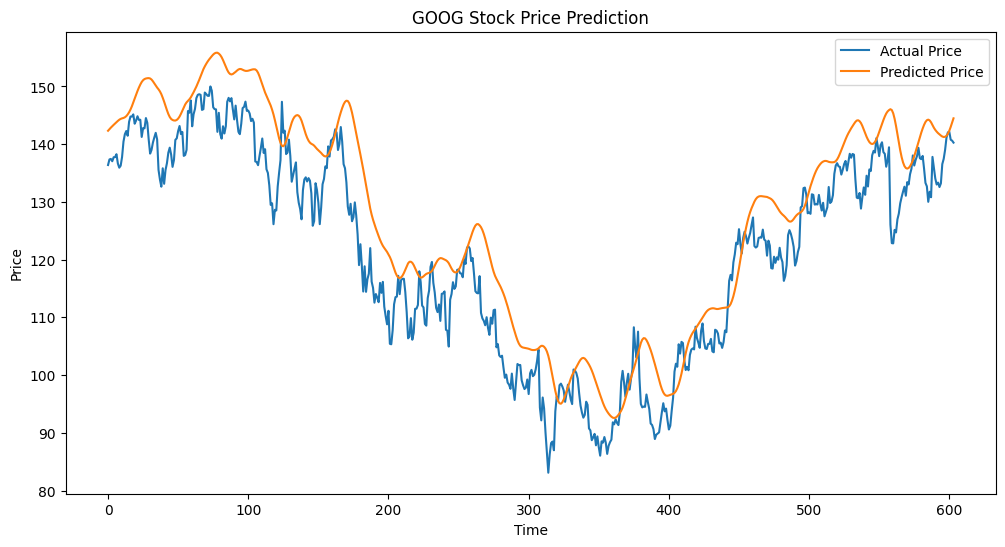

In [19]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_predicted, label='Predicted Price')
plt.title(f'{stock} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
